In [13]:
from segment_anything import SamPredictor, sam_model_registry
from PIL import Image
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import numpy as np
sam = sam_model_registry["vit_h"](checkpoint="/Users/francescocenciarelli/Downloads/sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)
image_path = './test_imgs/realLivia.png'
image = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB mode

# Generate masks
# Convert PIL image to NumPy array
image_np = np.array(image)

# Generate masks
masks = mask_generator.generate(image_np)

In [14]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

116
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


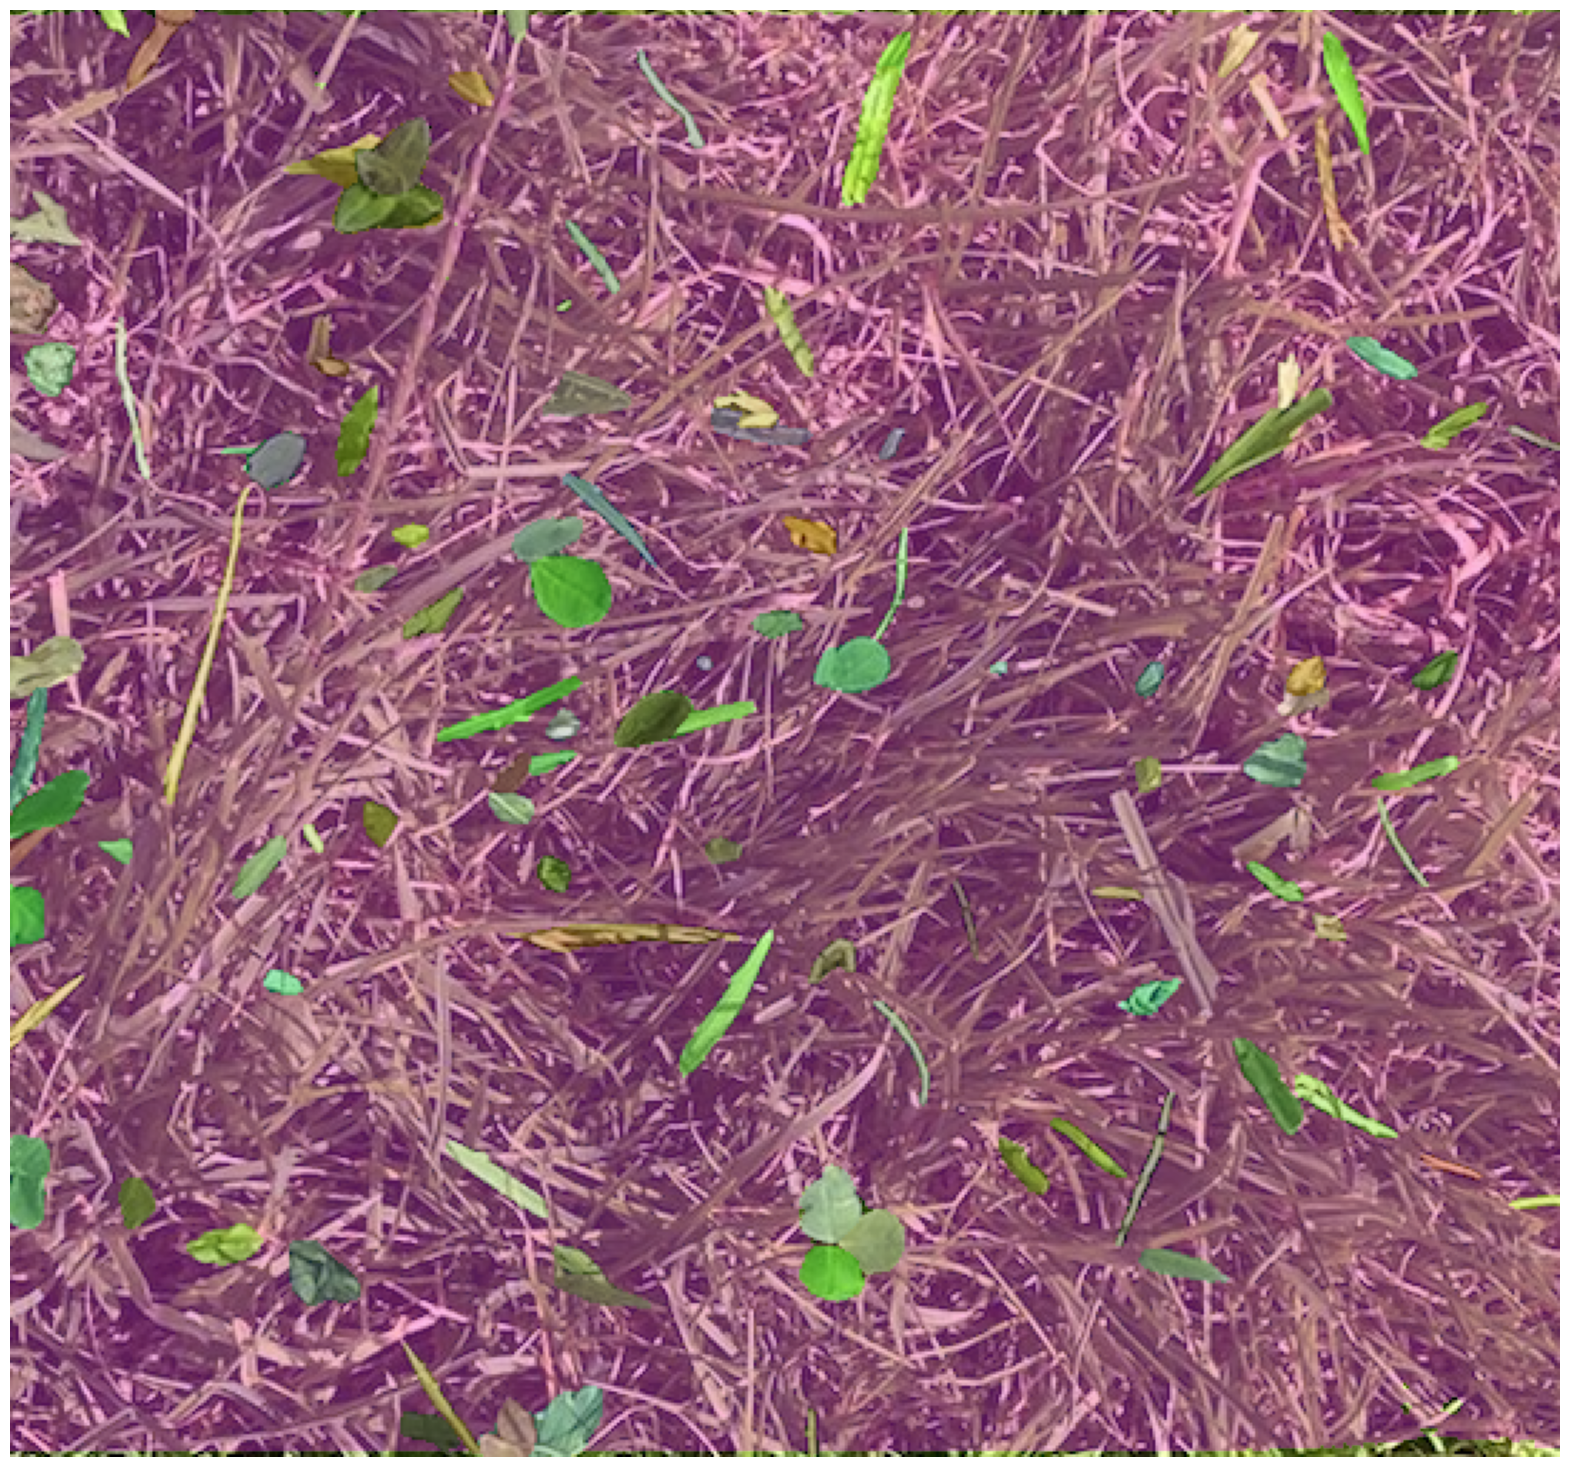

In [15]:
print(len(masks))
print(masks[0].keys())
import matplotlib.pyplot as plt



plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [19]:
torch.__version__

'2.3.1'